In [1]:
import pickle
import sklearn
from sklearn.cluster import KMeans, DBSCAN
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import manifold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
from FeatureExtraction import featureExtraction
model1 = models.vgg16(pretrained=True)
featureExtraction(model1, 'Image_featuresVGG16')

In [13]:
# Read features
infile = open('Image_featuresVGG16.pckl','rb')
features = pickle.load(infile)
infile.close()

In [14]:
features.shape

(2254, 25089)

# Classification (feature set VGG16)

In [15]:
# Array to store results of classifiers
Results = np.empty((6,3), dtype='object')
Validation = np.empty((6,5), dtype='object')

In [16]:
# Split data
real_labels = features[:,-1]
features = features[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(features, real_labels, test_size=0.2, stratify = real_labels)

## Logistic Regression

In [17]:
logistic = LogisticRegression(max_iter = 100000)
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

Error train: 0.0 %
Error test: 1.1086474501108667 %


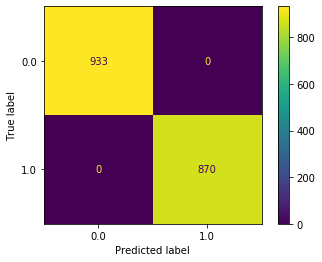

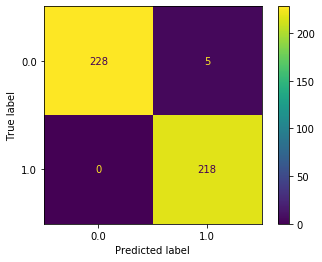

In [18]:
plot_confusion_matrix(logistic,X_train,y_train)
err = np.sum(logistic.predict(X_train) == y_train)/len(y_train)
Results[0,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(logistic,X_test,y_test)
err = np.sum(logistic.predict(X_test) == y_test)/len(y_test)
Results[0,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")


In [19]:
k = 5
cross_scores = cross_val_score(logistic, features, real_labels, cv=k, scoring='f1_weighted')
Validation[0,:] = cross_scores
print("Scores for k = ", k)
print("-->",cross_scores)

Scores for k =  5
--> [0.99112715 0.9911275  0.99778253 0.97557535 0.87658613]


## SVM (linear kernel)

In [20]:
parameters = {'C':[0.1,0.01,1,10]}
linear_kernel_svm_clf = SVC(kernel = "linear")
clf_linear = GridSearchCV(linear_kernel_svm_clf, parameters)
clf_linear.fit(X_train, y_train)
print(clf_linear.best_params_)
Results[1,2]=clf_linear.best_params_

{'C': 0.1}


In [22]:
clf_linear = SVC(kernel = "linear" , C = 0.1)
clf_linear.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

Error train: 0.0 %
Error test: 0.6651884700665134 %


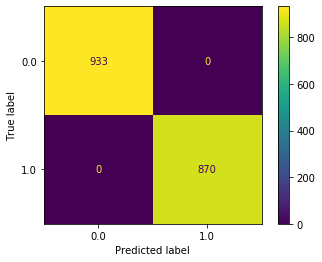

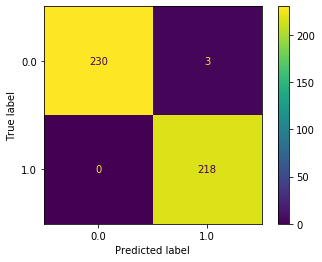

In [23]:
plot_confusion_matrix(clf_linear,X_train,y_train)
err = np.sum(clf_linear.predict(X_train) == y_train)/len(y_train)
Results[1,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_linear,X_test,y_test)
err = np.sum(clf_linear.predict(X_test) == y_test)/len(y_test)
Results[1,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [24]:
cross_scores = cross_val_score(clf_linear, features, real_labels, cv=k)
Validation[1,:] = cross_scores
print("Scores for k = ", k)
print("-->",cross_scores)

Scores for k =  5
--> [0.99113082 0.99113082 0.99556541 0.97117517 0.88444444]


## SVM (polynomial)

In [25]:
parameters = {'degree':[2,3,4,5], 'C':[0.1,0.01,1]}
poly_kernel_svm_clf = SVC(kernel = "poly")
clf = GridSearchCV(poly_kernel_svm_clf, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)
Results[2,2]=clf.best_params_

{'C': 1, 'degree': 2}


In [26]:
clf = SVC(kernel = "poly" , C = 1 , degree = 2)
clf.fit(X_train, y_train)

SVC(C=1, degree=2, kernel='poly')

Error train: 0.16638935108153063 %
Error test: 1.7738359201773801 %


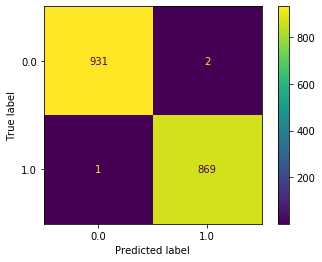

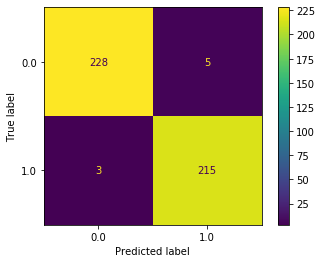

In [27]:
plot_confusion_matrix(clf,X_train,y_train)
err = np.sum(clf.predict(X_train) == y_train)/len(y_train)
Results[2,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf,X_test,y_test)
err = np.sum(clf.predict(X_test) == y_test)/len(y_test)
Results[2,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [28]:
k = 5
cross_scores = cross_val_score(clf, features, real_labels, cv=k)
Validation[2,:] = cross_scores
print("Scores for k = ", k)
print("-->",cross_scores)

Scores for k =  5
--> [0.99113082 0.98004435 0.99778271 0.97117517 0.87555556]


## SVM (rbf)

In [29]:
parameters = {'C':[0.1,0.01,1]}
rbf_kernel_svm_clf = SVC(kernel = "rbf")
clf_rbf = GridSearchCV(rbf_kernel_svm_clf, parameters)
clf_rbf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.1, 0.01, 1]})

In [30]:
print(clf_rbf.best_params_)
Results[3,2]=clf_rbf.best_params_

{'C': 1}


In [31]:
clf_rbf = SVC(kernel = "rbf", C = 1)
clf_rbf.fit(X_train, y_train)

SVC(C=1)

Error train: 0.2218524681087075 %
Error test: 2.4390243902439046 %


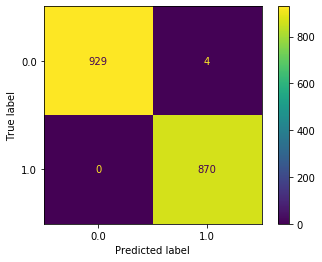

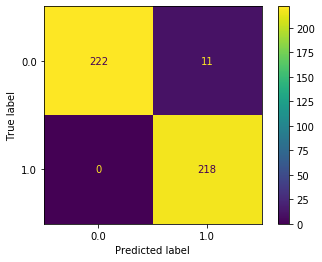

In [33]:
plot_confusion_matrix(clf_rbf,X_train,y_train)
err = np.sum(clf_rbf.predict(X_train) == y_train)/len(y_train)
Results[3,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_rbf, X_test,y_test)
err = np.sum(clf_rbf.predict(X_test) == y_test)/len(y_test)
Results[3,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [34]:
k = 5
cross_scores = cross_val_score(clf_rbf, features, real_labels, cv=k)
Validation[3,:] = cross_scores
print("Scores for k = ", k)
print("-->",cross_scores)

Scores for k =  5
--> [0.99113082 0.99556541 1.         0.98669623 0.85111111]


## Random Forest

In [35]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth':[2, 4, 6],}
random_forest = RandomForestClassifier()
clf_rf = GridSearchCV(random_forest, parameters)
clf_rf.fit(X_train, y_train)
print(clf_rf.best_params_)
Results[4,2]=clf_rf.best_params_

{'criterion': 'entropy', 'max_depth': 6}


In [36]:
clf_rf = RandomForestClassifier(criterion = 'entropy', max_depth = 6)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6)

Error train: 0.2773155851358844 %
Error test: 2.882483370288247 %


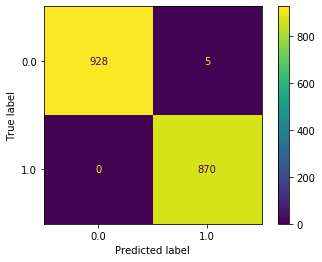

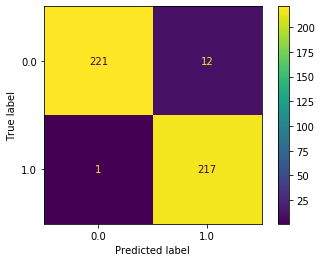

In [37]:
plot_confusion_matrix(clf_rf,X_train,y_train)
err = np.sum(clf_rf.predict(X_train) == y_train)/len(y_train)
Results[4,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_rf, X_test,y_test)
err = np.sum(clf_rf.predict(X_test) == y_test)/len(y_test)
Results[4,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [38]:
k = 5
cross_scores = cross_val_score(clf_rf, features, real_labels, cv=k)
Validation[4,:] = cross_scores
print("Scores for k = ", k)
print("-->", cross_scores)

Scores for k =  5
--> [0.99778271 0.99334812 1.         0.97117517 0.83111111]


## Gradient Boosting

In [40]:
parameters = {'learning_rate':[0.01, 0.1, 1]}
clf_gb = GradientBoostingClassifier()
clf_gb = GridSearchCV(clf_gb, parameters)
clf_gb.fit(X_train, y_train)
print(clf_gb.best_params_)
Results[5,2]=clf_gb.best_params_

KeyboardInterrupt: 

In [41]:
# pendiente tunear
clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier()

Error train: 0.0 %
Error test: 2.4390243902439046 %


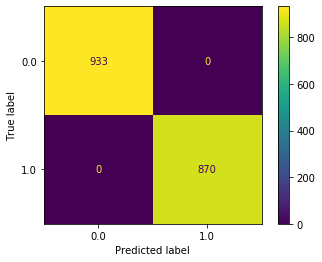

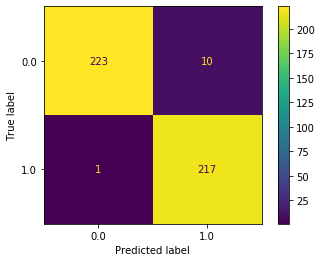

In [43]:
#print(clf_gb.best_params_)
Results[5,2]= 1

plot_confusion_matrix(clf_gb,X_train,y_train)
err = np.sum(clf_gb.predict(X_train) == y_train)/len(y_train)
Results[5,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_gb, X_test,y_test)
err = np.sum(clf_gb.predict(X_test) == y_test)/len(y_test)
Results[5,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [44]:
k = 5
cross_scores = cross_val_score(clf_gb, features, real_labels, cv=k)
Validation[5,k-2] = cross_scores
print("Scores for k = ", k)
print("-->",cross_scores)

Scores for k =  5
--> [0.99556541 0.98226164 0.99556541 0.98447894 0.86      ]


# Results

In [45]:
df = pd.DataFrame(data=Results, index=["Logistic Regression", "SVM linear kernel","SVM polynomial kernel","SVM rbf kernel","Random Forest", "Gradient Boosting"], columns=["Error train","Error test","Parameters"])

In [46]:
df

,Error train,Error test,Parameters
Logistic Regression,0.0%,1.1086474501108667%,None
SVM linear kernel,0.0%,0.6651884700665134%,{'C': 0.1}
SVM polynomial kernel,0.16638935108153063%,1.7738359201773801%,"{'C': 1, 'degree': 2}"
SVM rbf kernel,0.2218524681087075%,2.4390243902439046%,{'C': 1}
Random Forest,0.2773155851358844%,2.882483370288247%,"{'criterion': 'entropy', 'max_depth': 6}"
Gradient Boosting,0.0%,2.4390243902439046%,1


In [47]:
print(df.to_latex(index=True,  bold_rows = True) )

\begin{tabular}{llll}
\toprule
{} &           Error train &           Error test &                                Parameters \\
\midrule
\textbf{Logistic Regression  } &                  0.0\% &  1.1086474501108667\% &                                      None \\
\textbf{SVM linear kernel    } &                  0.0\% &  0.6651884700665134\% &                                \{'C': 0.1\} \\
\textbf{SVM polynomial kernel} &  0.16638935108153063\% &  1.7738359201773801\% &                     \{'C': 1, 'degree': 2\} \\
\textbf{SVM rbf kernel       } &   0.2218524681087075\% &  2.4390243902439046\% &                                  \{'C': 1\} \\
\textbf{Random Forest        } &   0.2773155851358844\% &   2.882483370288247\% &  \{'criterion': 'entropy', 'max\_depth': 6\} \\
\textbf{Gradient Boosting    } &                  0.0\% &  2.4390243902439046\% &                                         1 \\
\bottomrule
\end{tabular}



In [58]:
Validation[5,:] = Validation[5,:][3]

In [59]:
Av = []
for i in range(6):
    Av.append(np.mean(Validation[i,:]))
Av = np.array(Av)
Av = Av.reshape(Av.shape[0],1)
Validation = np.append(Validation, Av, axis = 1)

In [60]:
df2 = pd.DataFrame(data = Validation, index=["Logistic Regression", "SVM linear kernel","SVM polynomial kernel","SVM rbf kernel","Random Forest", "Gradient Boosting"], columns=["Fold 1","Fold 2", "Fold 3", "Fold 4", "Fold 5", "Average"])

In [61]:
df2

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Average
Logistic Regression,0.991127,0.991128,0.997783,0.975575,0.876586,0.96644
SVM linear kernel,0.991131,0.991131,0.995565,0.971175,0.884444,0.966689
SVM polynomial kernel,0.991131,0.980044,0.997783,0.971175,0.875556,0.963138
SVM rbf kernel,0.991131,0.995565,1,0.986696,0.851111,0.964901
Random Forest,0.997783,0.993348,1,0.971175,0.831111,0.958683
Gradient Boosting,0.995565,0.982262,0.995565,0.984479,0.86,0.963574


In [62]:
print(df2.to_latex(index=True, bold_rows = True))

\begin{tabular}{lllllll}
\toprule
{} &    Fold 1 &    Fold 2 &    Fold 3 &    Fold 4 &    Fold 5 &   Average \\
\midrule
\textbf{Logistic Regression  } &  0.991127 &  0.991128 &  0.997783 &  0.975575 &  0.876586 &   0.96644 \\
\textbf{SVM linear kernel    } &  0.991131 &  0.991131 &  0.995565 &  0.971175 &  0.884444 &  0.966689 \\
\textbf{SVM polynomial kernel} &  0.991131 &  0.980044 &  0.997783 &  0.971175 &  0.875556 &  0.963138 \\
\textbf{SVM rbf kernel       } &  0.991131 &  0.995565 &         1 &  0.986696 &  0.851111 &  0.964901 \\
\textbf{Random Forest        } &  0.997783 &  0.993348 &         1 &  0.971175 &  0.831111 &  0.958683 \\
\textbf{Gradient Boosting    } &  0.995565 &  0.982262 &  0.995565 &  0.984479 &      0.86 &  0.963574 \\
\bottomrule
\end{tabular}



## Dimensionality Reduction

In [63]:
X_e= manifold.TSNE( metric='euclidean', method='barnes_hut').fit_transform(features)

In [64]:
def plotPredictions(Xe,target,pred,title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.title.set_text('Real')
    ax2.title.set_text('Predicted')
    ax1.scatter(Xe[target==0,0],Xe[target==0,1],c="c",label="Empty")
    ax1.scatter(Xe[target==1,0],Xe[target==1,1],c="black",label="Occupied")
    ax2.scatter(Xe[pred==0,0],Xe[pred==0,1],c="c",label="Empty")
    ax2.scatter(Xe[pred==1,0],Xe[pred==1,1],c="black",label="Occupied")
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center')
    fig.set_size_inches(10, 5, forward=True)
    fig.suptitle(title)
    plt.show()

## Learning in lower dimensions (train best performance classifier in higher)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_e, real_labels, test_size=0.2, stratify = real_labels)

### Logistic Regression

In [66]:
logistic = LogisticRegression(max_iter = 100000)
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

Error train: 3.4941763727121433 %
Error test: 3.9911308203991136 %


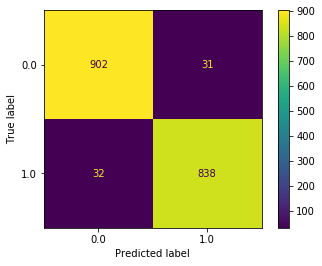

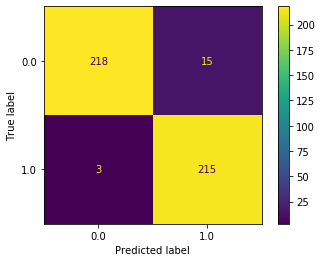

In [67]:
plot_confusion_matrix(logistic,X_train,y_train)
err = np.sum(logistic.predict(X_train) == y_train)/len(y_train)
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(logistic,X_test,y_test)
err = np.sum(logistic.predict(X_test) == y_test)/len(y_test)
print("Error test:",(1-err)*100,"%")

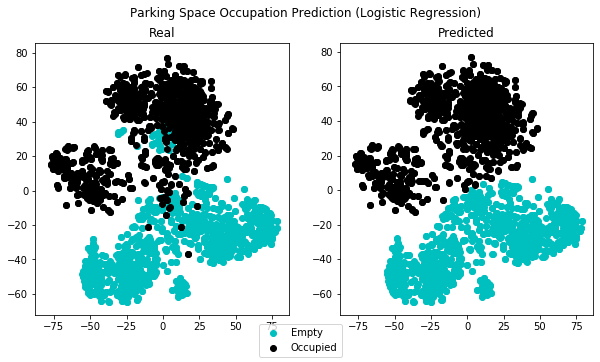

In [68]:
labels = logistic.predict(X_e)
plotPredictions(X_e, real_labels, labels,"Parking Space Occupation Prediction (Logistic Regression)")

### SVM (rbf)

In [69]:
clf_rbf = SVC(kernel = "rbf", C = 1)
clf_rbf.fit(X_train, y_train)

SVC(C=1)

Error train: 3.272323904603436 %
Error test: 3.9911308203991136 %


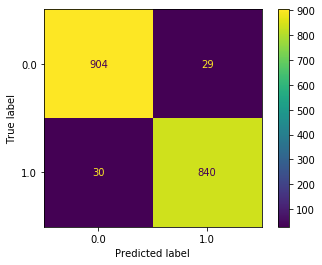

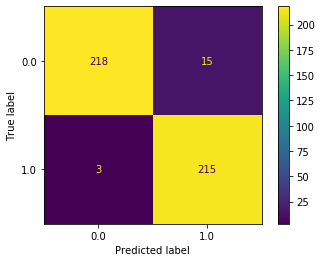

In [70]:
plot_confusion_matrix(clf_rbf,X_train,y_train)
err = np.sum(clf_rbf.predict(X_train) == y_train)/len(y_train)
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_rbf, X_test,y_test)
err = np.sum(clf_rbf.predict(X_test) == y_test)/len(y_test)
print("Error test:",(1-err)*100,"%")

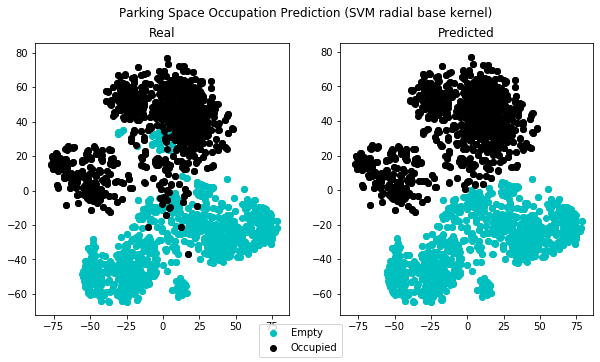

In [71]:
labels = clf_rbf.predict(X_e)
plotPredictions(X_e, real_labels, labels,"Parking Space Occupation Prediction (SVM radial base kernel)")

## Unsupervised Learning 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_e, real_labels, test_size=0.4, stratify = real_labels)
X_etest= manifold.TSNE( metric='euclidean', method='barnes_hut').fit_transform(X_test) 
km = KMeans(n_clusters=2)
km.fit(X_train)
labels = km.predict(X_test)
plotPredictions(X_etest, y_test, labels,"Parking Space Occupation Prediction (Kmeans)")
print(sklearn.metrics.confusion_matrix(y_test,labels))